In [ ]:
import os
os.getcwd()

In [133]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ddata=pd.read_csv('diabetes.csv')

In [134]:
ddata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [135]:
ddata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [136]:
ddata.shape

(768, 9)

In [137]:
ddata.pivot_table(ddata,index=['Diabetes'])

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Diabetes,,,,,,,,
neg,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,3.298000,19.664000
pos,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,4.865672,22.164179


In [138]:
neg_data =ddata[ddata['Diabetes'].str.contains('neg')]
neg_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
1,1,85,66,29,0,26.6,0.351,31,neg
3,1,89,66,23,94,28.1,0.167,21,neg
5,5,116,74,0,0,25.6,0.201,30,neg
7,10,115,0,0,0,35.3,0.134,29,neg
10,4,110,92,0,0,37.6,0.191,30,neg
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,neg
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg


In [139]:
ddata.apply(lambda x: sum(x.isnull()),axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

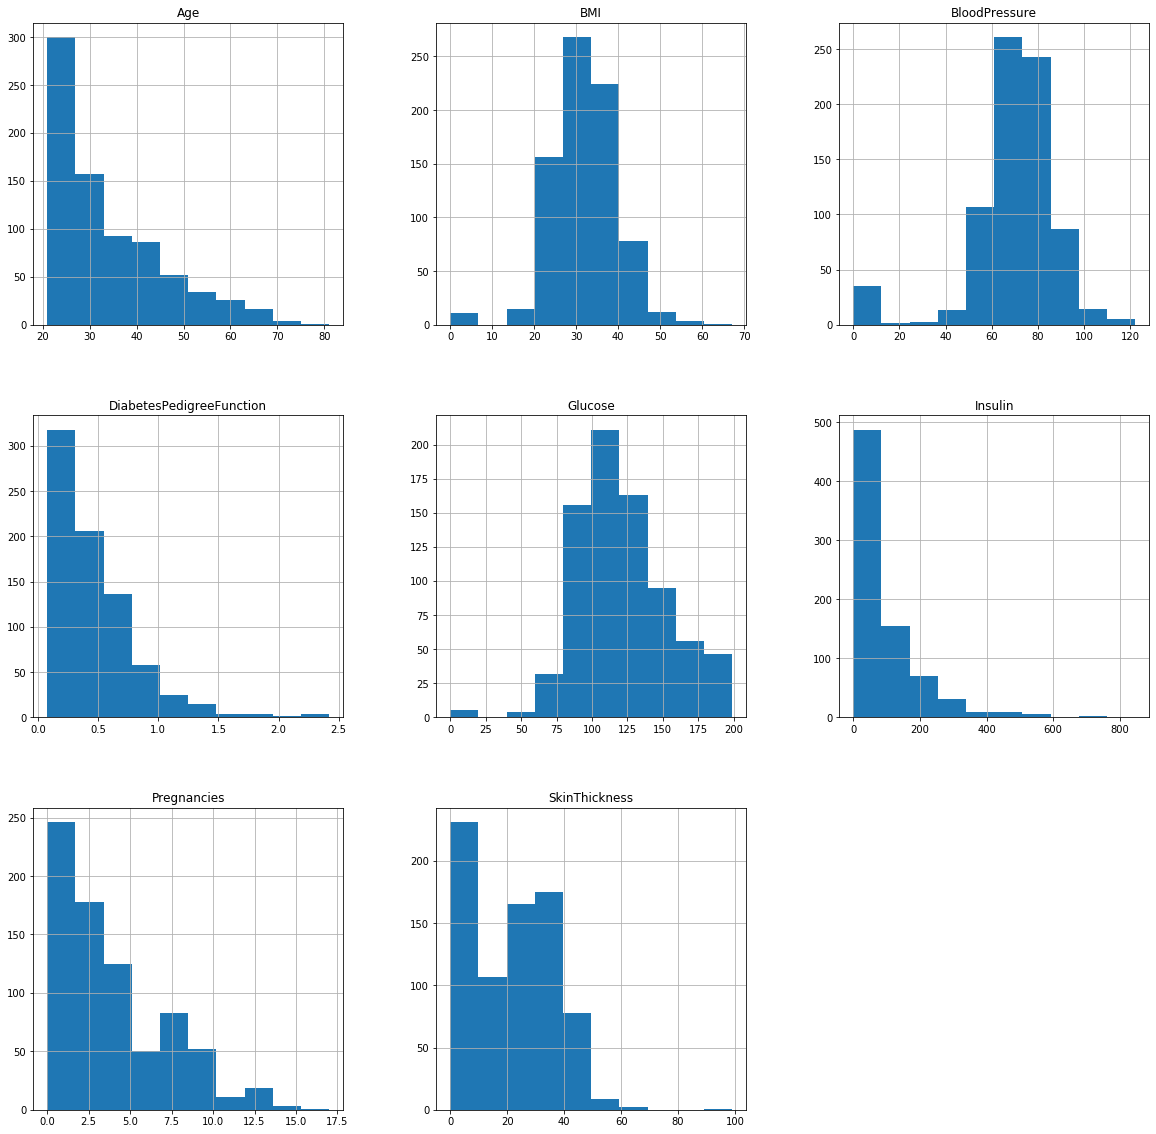

In [140]:
p = ddata.hist(figsize = (20,20))

In [141]:
ddata['Diabetes'].replace(['pos','neg'],[1,0],inplace=True)

In [142]:
ddata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [143]:
x=ddata.iloc[:,0:8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [144]:
y=ddata.iloc[:,8]
y.shape

(768,)

In [145]:
#Apply MinMax normalization
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [146]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [147]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
627,0,132,78,0,0,32.4,0.393,21
450,1,82,64,13,95,21.2,0.415,23
23,9,119,80,35,0,29.0,0.263,29
548,1,164,82,43,67,32.8,0.341,50
616,6,117,96,0,0,28.7,0.157,30
...,...,...,...,...,...,...,...,...
199,4,148,60,27,318,30.9,0.150,29
61,8,133,72,0,0,32.9,0.270,39
639,1,100,74,12,46,19.5,0.149,28
212,7,179,95,31,0,34.2,0.164,60


In [148]:
y_train = y_train.astype('int')
y_train

627    0
450    0
23     1
548    0
616    0
      ..
199    1
61     1
639    0
212    0
143    1
Name: Diabetes, Length: 537, dtype: int32

In [149]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
#Predicting the Test Set results
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [151]:
y_test

440    1
55     0
351    0
103    0
658    0
      ..
608    0
214    1
308    1
102    0
367    0
Name: Diabetes, Length: 231, dtype: int64

In [102]:
#confusion_matrix to accept the model or reject the model.
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
clf_cm_test = confusion_matrix(y_test,y_pred)
clf_cm_test

array([[114,  23],
       [ 49,  45]], dtype=int64)

In [103]:
#Obtain accuracy
accuracy = clf.score(x_test,y_test)
accuracy

0.6883116883116883

In [104]:
#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(x_test)

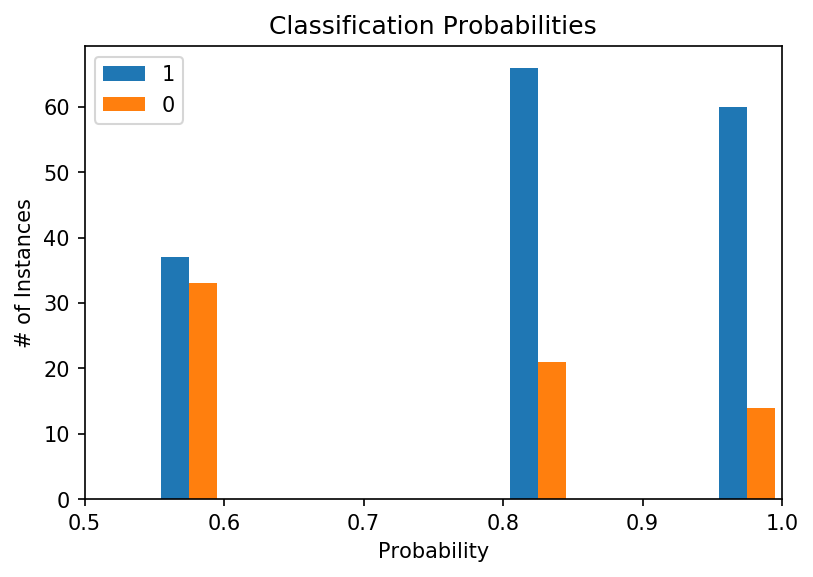

In [105]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [106]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

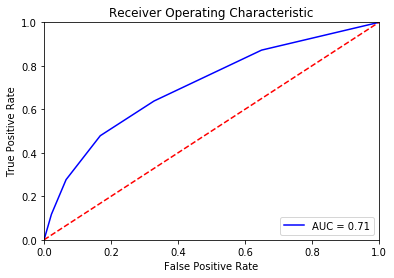

In [107]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
#Test new data
example_measures=np.array([15,120,90,45,150,35.2,0.555,66])
example_measures = example_measures.reshape(1,-1)
example_measures

array([[ 15.   , 120.   ,  90.   ,  45.   , 150.   ,  35.2  ,   0.555,
         66.   ]])

In [109]:
prediction = clf.predict(example_measures)

In [110]:
print(prediction)

[1]


In [111]:
#Perform Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression

cls =LogisticRegression(random_state =0)

lr_cls=cls.fit(x_train, y_train)

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
#Predicting on test and train data
lr_y_test =lr_cls.predict(x_test)
lr_y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [113]:
lr_y_train = lr_cls.predict(x_train)
lr_y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [114]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
lr_cm_test = confusion_matrix(y_test, lr_y_test)
lr_cm_test

array([[126,  11],
       [ 54,  40]], dtype=int64)

In [115]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score
lr_accu_test= accuracy_score(y_test,lr_y_test)
lr_accu_test

0.7186147186147186

In [116]:
lr_accu_train= accuracy_score(y_train,lr_y_train)  #train 98--rs=50  
lr_accu_train

0.7970204841713222

In [117]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
#recall_score
lr_precision_test =precision_score(y_test, lr_y_test, average='weighted')  
print(lr_precision_test)
lr_precision_train =precision_score(y_train, lr_y_train, average='weighted')
print(lr_precision_train)

0.7343094813683049
0.7918383612943046


In [118]:
#Support Vector Classification
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(x_train, y_train)

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [119]:
#predicting on test and train data
svc_y_test = sc_classifier.predict(x_test)
print(svc_y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [120]:
svc_y_train=sc_classifier.predict(x_train)
print(svc_y_train)

[1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 1 0 1 0 1 0 

In [121]:
#build Confusion Matrix on Test and Train SVC data
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test,svc_y_test)
svc_cm_test

array([[137,   0],
       [ 94,   0]], dtype=int64)

In [122]:
svc_cm_train = confusion_matrix(y_train,svc_y_train)
svc_cm_train

array([[363,   0],
       [  0, 174]], dtype=int64)

In [123]:
#Accuracy Classification Score
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test, svc_y_test)
svc_acc_test

0.5930735930735931

In [124]:
svc_acc_train = accuracy_score(y_train, svc_y_train)
svc_acc_train

1.0

In [125]:
#Precision Score on TEST and TRAIN DATA
from sklearn.metrics import precision_score
sv_precision_test=precision_score(y_test, svc_y_test, average='weighted')
print(sv_precision_test)
sv_precision_train = precision_score(y_train, svc_y_train, average='weighted')
print(sv_precision_train)

0.3517362868012219
1.0


C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf= DecisionTreeClassifier(max_depth = 3)
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
#predict on test and trained data
dtc_y_test = dtc_clf.predict(x_test)
dtc_y_test

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [128]:
dtc_y_train = dtc_clf.predict(x_train)
dtc_y_train

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,

In [129]:
#build a Confusion matrix on test and train
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, dtc_y_test)
dtc_cm_test

array([[112,  25],
       [ 43,  51]], dtype=int64)

In [130]:
#Accuracy Score on test and train
from sklearn.metrics import accuracy_score
dtc_accu_test = accuracy_score(y_test, dtc_y_test)
dtc_accu_test

0.7056277056277056

In [131]:
dtc_accu_train = accuracy_score(y_train, dtc_y_train)
dtc_accu_train

0.8249534450651769

In [132]:
#precision Score On Test and Train
from sklearn.metrics import precision_score
dtc_precision_test =  precision_score(y_test, dtc_y_test, average='weighted')
print(dtc_precision_test)
dtc_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(dtc_precision_train)


0.7016125357381724
0.8294538027346816


In [153]:
#BUILD Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf =  RandomForestClassifier(max_depth=3, random_state=0)
rf_classi = rmf.fit(x_train, y_train)

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [154]:
#predict on test and train 
rf_y_test = rf_classi.predict(x_test)
rf_y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [155]:
rf_y_train = rf_classi.predict(x_train)
rf_y_train

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [158]:
#Build cnfusion matrix on test and train
from sklearn.metrics import confusion_matrix
rf_cm_test = confusion_matrix(y_test, rf_y_test)
rf_cm_test

array([[146,  11],
       [ 43,  31]], dtype=int64)

In [159]:
rf_cm_train = confusion_matrix(y_train, rf_y_train)
rf_cm_train

array([[321,  22],
       [104,  90]], dtype=int64)

In [160]:
#Accuracy Score on Test and Train
from sklearn.metrics import accuracy_score
rf_accu_test= accuracy_score(y_test,rf_y_test)  #test
rf_accu_test

0.7662337662337663

In [161]:
rf_accu_train= accuracy_score(y_train,rf_y_train)  
rf_accu_train

0.7653631284916201

In [162]:
#Precision Score on Test and Train
from sklearn.metrics import precision_score
rf_precision_test =precision_score(y_test, rf_y_test, average='weighted')  
print(rf_precision_test)  #test data
rf_precision_train =precision_score(y_train, rf_y_train, average='weighted')
print(rf_precision_train) #train data

0.7614695709933804
0.7727350828599596


In [163]:
from sklearn.metrics import recall_score
rf_recall_test=recall_score(y_test,rf_y_test, average='weighted' )
print(rf_recall_test)
rf_recall_train=recall_score(y_train,rf_y_train, average='weighted' )
print(rf_recall_train)

0.7662337662337663
0.7653631284916201


In [164]:
#Perform AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

In [165]:
print(results)

[0.72222222 0.75925926 0.75925926 0.7962963  0.75925926 0.77777778
 0.77777778 0.64150943 0.77358491 0.67924528]


In [166]:
print(results.mean())

0.7446191474493362
